In [91]:
import pandas as pd
import numpy as np
import string
import os
import sys
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

식사 항목의 가격 문제

In [92]:
#계산대에서의 진짜 가격
p_fish = 150;p_chips = 50;p_ketchup = 100

In [93]:
#식사 가격 샘플: 10일 동안의 식사 가격 일반화 데이터
np.random.seed(100)
portions = np.random.randint(low=1, high=10, size=3 )
portions
X = [];y = [];days=10
for i in range(days):
    portions = np.random.randint(low=1, high=10, size=3 )
    price = p_fish * portions[0] + p_chips * portions[1] + p_ketchup * portions[2]    
    X.append(portions)
    y.append(price)
    
X = np.array(X)
y = np.array(y)

In [94]:
print (X,y)

[[8 8 1]
 [5 3 6]
 [3 3 3]
 [2 1 9]
 [5 1 7]
 [3 5 2]
 [6 4 5]
 [5 4 8]
 [2 2 8]
 [8 1 3]] [1700 1500  900 1250 1500  900 1600 1750 1200 1550]


In [95]:
#선형모형 만들기
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback

In [96]:
price_guess = [np.array([[ 50 ],
        [   50],
        [  50 ]]) ]

In [97]:
model_input = Input(shape=(3,), dtype='float32')
model_output = Dense(1, activation='linear', use_bias=False, 
                     name='LinearNeuron',
                     weights=price_guess)(model_input)
sgd = SGD(lr=0.01)
model = Model(model_input, model_output)
model.compile(loss="mean_squared_error", optimizer=sgd)

In [98]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
LinearNeuron (Dense)         (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [99]:
history = model.fit(X, y, batch_size=20, epochs=30,verbose=2)
l4  = history.history['loss']

Epoch 1/30
 - 0s - loss: 566500.0000
Epoch 2/30
 - 0s - loss: 38576.1836
Epoch 3/30
 - 0s - loss: 9320.0039
Epoch 4/30
 - 0s - loss: 6873.8516
Epoch 5/30
 - 0s - loss: 5998.2476
Epoch 6/30
 - 0s - loss: 5313.0718
Epoch 7/30
 - 0s - loss: 4722.4746
Epoch 8/30
 - 0s - loss: 4205.7593
Epoch 9/30
 - 0s - loss: 3750.5222
Epoch 10/30
 - 0s - loss: 3347.5703
Epoch 11/30
 - 0s - loss: 2989.7498
Epoch 12/30
 - 0s - loss: 2671.2886
Epoch 13/30
 - 0s - loss: 2387.4253
Epoch 14/30
 - 0s - loss: 2134.1394
Epoch 15/30
 - 0s - loss: 1907.9808
Epoch 16/30
 - 0s - loss: 1705.9365
Epoch 17/30
 - 0s - loss: 1525.3795
Epoch 18/30
 - 0s - loss: 1363.9905
Epoch 19/30
 - 0s - loss: 1219.7111
Epoch 20/30
 - 0s - loss: 1090.7163
Epoch 21/30
 - 0s - loss: 975.3729
Epoch 22/30
 - 0s - loss: 872.2355
Epoch 23/30
 - 0s - loss: 780.0091
Epoch 24/30
 - 0s - loss: 697.5385
Epoch 25/30
 - 0s - loss: 623.7887
Epoch 26/30
 - 0s - loss: 557.8368
Epoch 27/30
 - 0s - loss: 498.8590
Epoch 28/30
 - 0s - loss: 446.1151
Epoch 

In [100]:
model.get_layer('LinearNeuron').get_weights()

[array([[143.07005 ],
        [ 58.228107],
        [101.30583 ]], dtype=float32)]

dict_keys(['loss'])


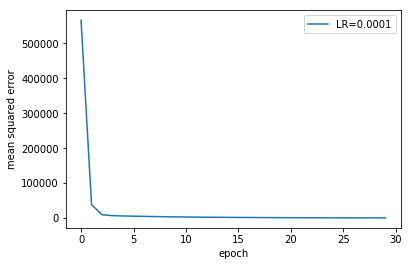

In [101]:
print(history.history.keys())
#plt.plot(l1)
#plt.plot(l2)
#plt.plot(l3)
plt.plot(l4)

plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(["LR=0.0001","LR=0.001","LR=0.01"])
plt.show()


In [102]:
#LR 효과 관찰

케라스에서 XOR 문제

In [103]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [104]:
#XOR 는 선형으로 분리가능한 문제가 아니다.
#선형 모델에 비선형층을 추가하면 작동하지 않는다.


model_input = Input(shape=(2,), dtype='float32')
z = Dense(2,name='HiddenLayer', kernel_initializer='ones', activation='relu')(model_input)
#z = Activation('relu')(z)
z = Dense(1, name='OutputLayer')(z)
model_output = Activation('sigmoid')(z)
model = Model(model_input, model_output)
#model.summary()

In [105]:
sgd = SGD(lr=0.5)
#model.compile(loss="mse", optimizer=sgd)
model.compile(loss="binary_crossentropy", optimizer=sgd)

In [106]:
model.fit(X, y, batch_size=4, epochs=200,verbose=0)
preds = np.round(model.predict(X),decimals=3)
pd.DataFrame({'Y_actual':list(y), 'Predictions':list(preds)})

,Y_actual,Predictions
0,[0],[0.662]
1,[1],[0.662]
2,[1],[0.662]
3,[0],[0.012]


In [107]:
model.get_weights()

[array([[1.1208413, 1.5818743],
        [1.1208413, 1.5818743]], dtype=float32),
 array([-1.2651404, -1.6912061], dtype=float32),
 array([[-1.5429004],
        [-2.4549627]], dtype=float32),
 array([0.6719264], dtype=float32)]

In [108]:
hidden_layer_output = Model(inputs=model.input,
                                 outputs=model.get_layer('HiddenLayer').output)

In [109]:
projection = hidden_layer_output.predict(X)

In [110]:
for i in range(4):
    print (X[i], projection[i])

[0 0] [0. 0.]
[0 1] [0. 0.]
[1 0] [0. 0.]
[1 1] [0.9765421 1.4725424]


In [111]:
import matplotlib.pyplot as plt

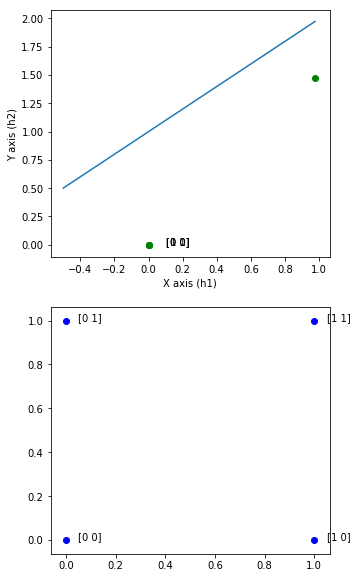

In [112]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(211)
plt.scatter(x=projection[:, 0], y=projection[:, 1], c=('g'))

ax.set_xlabel('X axis (h1)')
ax.set_ylabel('Y axis (h2)')
ax.set_label('Transformed Space')

#입력을 선형으로 분리가능하게 변환하는  은닉층 
x1, y1 = [projection[0, 0]-0.5, projection[3, 0]], [projection[0, 1]+0.5, projection[3, 1]+0.5]
plt.plot(x1, y1)
for i, inputx in enumerate(X):
    ax.annotate(str(inputx), (projection[i, 0]+0.1,projection[i, 1]))
ax = fig.add_subplot(212)
ax.set_label('Original Space')
plt.scatter(x=X[:, 0], y=X[:, 1], c=('b'))
for i, inputx in enumerate(X):
    ax.annotate(str(inputx), (X[i, 0]+0.05,X[i, 1]))


In [113]:
plt.show()

In [114]:
projection

array([[0.       , 0.       ],
       [0.       , 0.       ],
       [0.       , 0.       ],
       [0.9765421, 1.4725424]], dtype=float32)

In [115]:
#Logistic neuron: Logistic regression

In [116]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [117]:
X = data.data
y = data.target

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [119]:
X_train.shape

(398, 30)

In [120]:
model_input = Input(shape=(30,), dtype='float32')

model_output = Dense(1, activation='sigmoid',
                     name='SigmoidNeuron')(model_input)
sgd = SGD(lr=0.01)
model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [121]:
scaler = StandardScaler()
model.fit(scaler.fit_transform(X_train), y_train, batch_size=10, epochs=5,verbose=2,
          validation_data=(scaler.fit_transform(X_test), y_test))

Train on 398 samples, validate on 171 samples
Epoch 1/5
 - 0s - loss: 0.3307 - acc: 0.8794 - val_loss: 0.2490 - val_acc: 0.9357
Epoch 2/5
 - 0s - loss: 0.2580 - acc: 0.9196 - val_loss: 0.2032 - val_acc: 0.9474
Epoch 3/5
 - 0s - loss: 0.2223 - acc: 0.9397 - val_loss: 0.1769 - val_acc: 0.9474
Epoch 4/5
 - 0s - loss: 0.2003 - acc: 0.9447 - val_loss: 0.1595 - val_acc: 0.9474
Epoch 5/5
 - 0s - loss: 0.1851 - acc: 0.9497 - val_loss: 0.1467 - val_acc: 0.9591


In [122]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets.samples_generator import make_regression 


m=82.90456141637904, c=-3.709228868670303


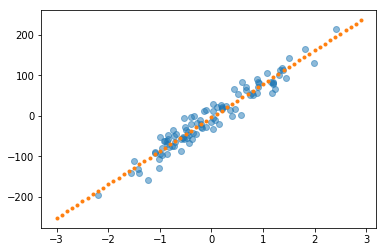

In [123]:
x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2017)
x = x.flatten()
slope, intercept, _,_,_ = stats.linregress(x,y)
print("m={}, c={}".format(slope,intercept))
best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')

In [124]:
plt.show()

In [125]:
def gradient_descent(x, y, theta_init, step=0.1, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter
xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)
theta = history[-1]
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))

Gradient Descent: -3.73, 82.80 73
Least Squares: -3.71, 82.90


/usr/local/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)


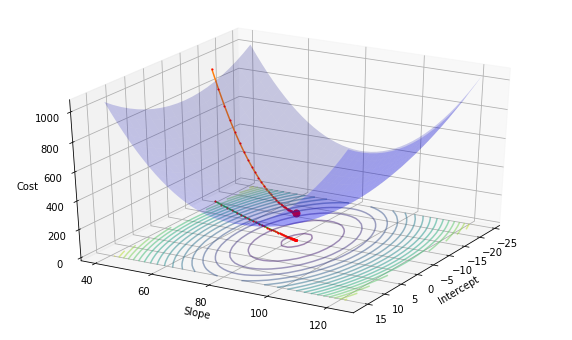

In [126]:
from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost')
ax.view_init(elev=30., azim=30)
ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);
#ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);

In [127]:
plt.show()

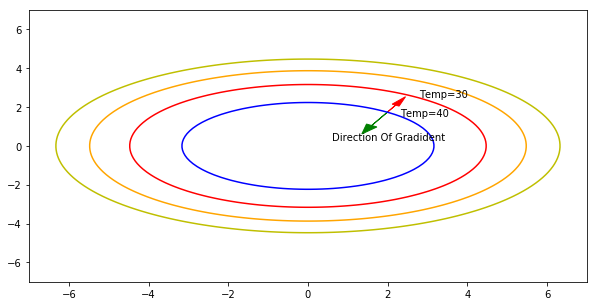

In [128]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
xlist = np.linspace(-7.0, 7.0, 100) # Create 1-D arrays for x,y dimensions
ylist = np.linspace(-7.0, 7.0, 100)
X,Y = np.meshgrid(xlist, ylist) # Create 2-D grid xlist,ylist values
Z = 50 - X**2 - 2*Y**2  # Compute function values on the grid
plt.contour(X, Y, Z, [10,20,30,40], colors = ['y','orange','r','b'], linestyles = 'solid')
ax.annotate('Direction Of Gradident', xy=(.6, 0.3), xytext=(.6, 0.3))
ax.annotate('Temp=30', xy=(2.8, 2.5), xytext=(2.8, 2.5))
ax.annotate('Temp=40', xy=(2.3, 2), xytext=(2.3, 1.5))
#ax.arrow(0, 0, 6.9, 6.8, head_width=0.5, head_length=0.5, fc='k', ec='k')
ax.arrow(2, 1.75, 2*2/20, 4*1.75/20, head_width=0.2, head_length=0.5, fc='r', ec='r')
ax.arrow(2, 1.75, -2*2/10, -4*1.75/10, head_width=0.3, head_length=0.5, fc='g', ec='g')

plt.show()

In [129]:
50 - 2**2 - 2*1.75**2

39.875

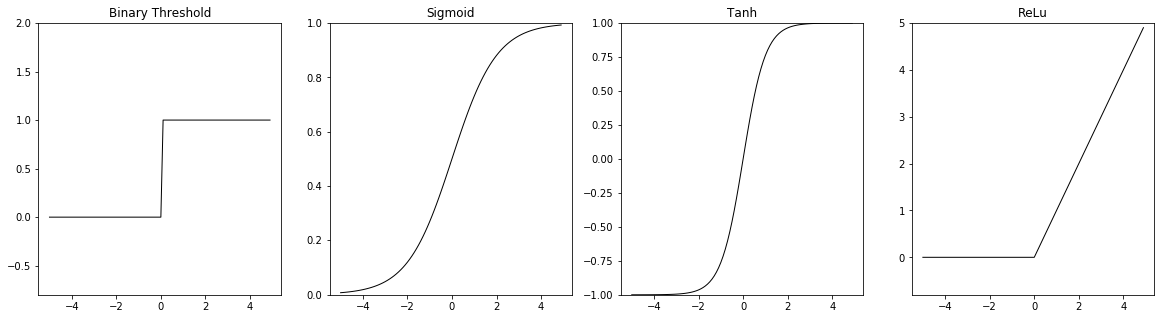

In [130]:
import numpy as np
import matplotlib.pylab as plt


def step(x):
    return np.array(x > 0, dtype=np.int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return (np.exp(x)-np.exp(-x)) / (np.exp(x) + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y_step = step(x)
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)
fig, axes = plt.subplots(ncols=4, figsize=(20, 5))
ax = axes[0]
ax.plot(x, y_step,label='Binary Threshold',  color='k', lw=1, linestyle=None)
ax.set_ylim(-0.8,2)
ax.set_title('Binary Threshold')

ax = axes[1]
ax.plot(x, y_sigmoid,label='Sigmoid',  color='k', lw=1, linestyle=None)
ax.set_ylim(-0.001,1)
ax.set_title('Sigmoid')

ax = axes[2]
ax.plot(x, y_tanh,label='Tanh',  color='k', lw=1, linestyle=None)
ax.set_ylim(-1.,1)
ax.set_title('Tanh')

ax = axes[3]
ax.plot(x, y_relu,label='ReLu',  color='k', lw=1, linestyle=None)
ax.set_ylim(-0.8,5)
ax.set_title('ReLu')


plt.show()

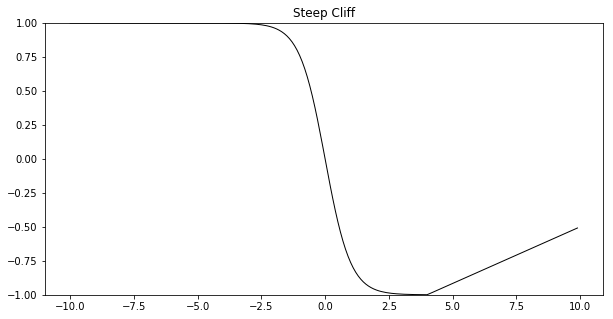

In [131]:
x = np.arange(-10.0, 10.0, 0.1)
def lineup(x):
    return (x-4)/12-1

def cliff(x):
    x1 = -tanh(x[x<4])
    x2 = np.apply_along_axis(lineup, 0, x[x>4])
    return np.concatenate([x1, x2])
y_cliff = cliff(x)

    
fig, axes = plt.subplots(ncols=1, figsize=(10, 5))
ax = axes
ax.plot(x, y_cliff,label='Steep Cliff',  color='k', lw=1, linestyle=None)
ax.set_ylim(-1.,1)
ax.set_title('Steep Cliff')
plt.show()

## 다항식 곡선 접합

In [132]:
from math import sin, pi
N = 100; max_degree = 20
noise = np.random.normal(0, 0.2, N)

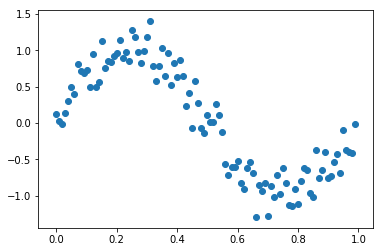

In [133]:
df = pd.DataFrame( index=list(range(N)),columns=list(range(1,max_degree)))
for i in range(N):
    df.loc[i]=[pow(i/N,n) for n in range(1,max_degree)]
df['y']=[sin(2*pi*x/N)+noise[x] for x in range(N)]

plt.scatter(x=df[1], y=df['y'])
plt.show()

In [134]:
from tensorflow.keras.initializers import RandomNormal
degree = 3
X = df[list(range(1,degree+1))].values
y = df['y'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.60, random_state=42)
model_input = Input(shape=(degree,), dtype='float32')
model_output = Dense(1, activation='linear', name='LinearNeuron')(model_input)
sgd = SGD(lr=0.3)
model = Model(model_input, model_output)
model.compile(loss="mean_squared_error", optimizer=sgd)

In [135]:
history = model.fit(X_train,y_train , batch_size=10, epochs=1000,verbose=0, validation_data=(X_test,y_test) )

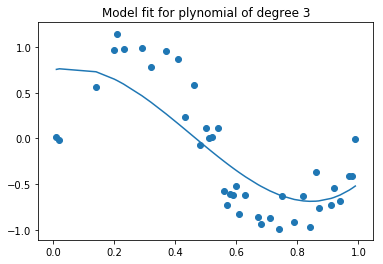

In [136]:
y_pred = model.predict(X_train)
plt.scatter(X_train[:,0], y_train)
plt.plot(np.sort(X_train[:,0]), y_pred[X_train[:,0].argsort()])
plt.title("Model fit for plynomial of degree {}".format(degree))
plt.show()

In [137]:
model.get_weights()

[array([[ 0.89315957],
        [-8.131035  ],
        [ 5.99785   ]], dtype=float32), array([0.74606186], dtype=float32)]

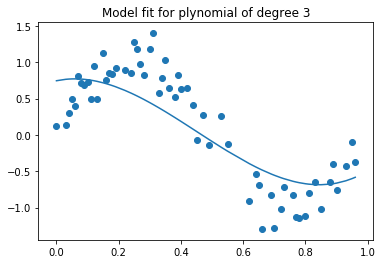

In [138]:
y_pred = model.predict(X_test)
plt.scatter(X_test[:,0], y_test)
plt.plot(np.sort(X_test[:,0]), y_pred[X_test[:,0].argsort()])
plt.title("Model fit for plynomial of degree {}".format(degree))
plt.show()

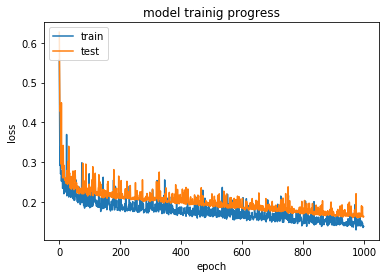

In [139]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model trainig progress')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 경사도 노름(Norm) 계산

In [140]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def get_gradient_norm_func(model):
    grads = K.gradients(model.total_loss, model.trainable_weights)
    summed_squares = [K.sum(K.square(g)) for g in grads]
    norm = K.sqrt(sum(summed_squares))
    
    #list concatenation : inputs followed by target , followed by sample weights (all 1 in this case)
    inputs = [model._feed_inputs , model._feed_targets , model._feed_sample_weights]
    #K.function 는 다대다 함수를 만들 수 있도록 입력과 출력의 텐서를 리스트로 만들어 준다. 
    func = K.function(inputs, [norm])
    return func

In [141]:
x = np.random.random((128,)).reshape((-1, 1))
y = 2 * x
model = Sequential(layers=[Dense(2, input_shape=(1,)),
                               Dense(1)])
model.compile(loss='mse', optimizer='rmsprop')

In [149]:
get_gradient = get_gradient_norm_func(model)
gradients_per_epoc =[]
for i in range(5):
    history = model.fit(x, y, epochs=1,batch_size=10, verbose=0)
    gradients_per_epoc = gradients_per_epoc + get_gradient([x, y, np.ones(len(y))])


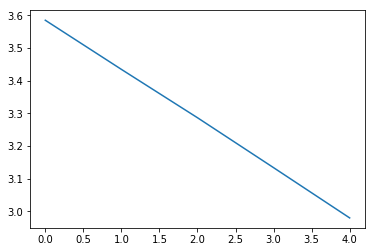

In [150]:
plt.plot(gradients_per_epoc)
plt.show()

In [151]:
x

array([[0.10788755],
       [0.8853363 ],
       [0.89705514],
       [0.53982084],
       [0.90269146],
       [0.97770239],
       [0.37655468],
       [0.11024708],
       [0.79130639],
       [0.95391815],
       [0.04991951],
       [0.82891847],
       [0.26727656],
       [0.83391557],
       [0.64722542],
       [0.7221099 ],
       [0.5481335 ],
       [0.73597876],
       [0.84322145],
       [0.86969171],
       [0.5740088 ],
       [0.21925519],
       [0.41591336],
       [0.90353362],
       [0.51540748],
       [0.46259519],
       [0.26895956],
       [0.12814907],
       [0.81059927],
       [0.28633677],
       [0.71214153],
       [0.93012542],
       [0.96342812],
       [0.34918957],
       [0.79718675],
       [0.69736944],
       [0.47421915],
       [0.78816263],
       [0.85923959],
       [0.60775367],
       [0.82056629],
       [0.73546004],
       [0.81016241],
       [0.41252949],
       [0.0756464 ],
       [0.82537343],
       [0.82713089],
       [0.814

In [145]:
y

array([[0.2157751 ],
       [1.77067261],
       [1.79411029],
       [1.07964167],
       [1.80538292],
       [1.95540479],
       [0.75310936],
       [0.22049417],
       [1.58261279],
       [1.9078363 ],
       [0.09983901],
       [1.65783693],
       [0.53455313],
       [1.66783114],
       [1.29445083],
       [1.4442198 ],
       [1.096267  ],
       [1.47195753],
       [1.68644291],
       [1.73938342],
       [1.1480176 ],
       [0.43851038],
       [0.83182671],
       [1.80706724],
       [1.03081497],
       [0.92519039],
       [0.53791911],
       [0.25629813],
       [1.62119854],
       [0.57267354],
       [1.42428307],
       [1.86025083],
       [1.92685625],
       [0.69837915],
       [1.59437351],
       [1.39473889],
       [0.9484383 ],
       [1.57632525],
       [1.71847918],
       [1.21550734],
       [1.64113258],
       [1.47092007],
       [1.62032482],
       [0.82505899],
       [0.1512928 ],
       [1.65074685],
       [1.65426178],
       [1.628

In [152]:
#The parameters clipnorm and clipvalue can be used with all optimizers to control gradient clipping:
from tensorflow.keras import optimizers
# All parameter gradients will be clipped to max norm of 1.0
sgd = optimizers.SGD(lr=0.01, clipnorm=1.)
#Similarly for ADAM
adam = optimizers.Adam(clipnorm=1.)

In [153]:
import tensorflow as tf

# Initialize 3 constants: 2 vectors, a scalar and a 2D tensor
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])
b = tf.constant(10)
W = tf.constant(-1, shape=[4, 2])
# Elementwise Multiply/subtract
res_elem_wise_mult = tf.multiply(x1, x2)
res_elem_wise_sub = tf.subtract(x1, x2)

#dot product of two tensors of compatable shapes
res_dot_product = tf.tensordot(x1, x2, axes=1)
#broadcasting : add scalar 10 to all elements of the vector
res_broadcast = tf.add(x1, b)
#Calculating Wtx
res_matrix_vector_dot = tf.multiply(tf.transpose(W), x1)

#scalar multiplication
scal_mult_matrix = tf.scalar_mul(scalar=10, x=W)
# Initialize Session and execute
with tf.Session() as sess:
    output = sess.run([res_elem_wise_mult,res_elem_wise_sub, res_dot_product,
                       res_broadcast,res_matrix_vector_dot,
                      scal_mult_matrix])
    print(output)

[array([ 5, 12, 21, 32], dtype=int32), array([-4, -4, -4, -4], dtype=int32), 70, array([11, 12, 13, 14], dtype=int32), array([[-1, -2, -3, -4],
       [-1, -2, -3, -4]], dtype=int32), array([[-10, -10],
       [-10, -10],
       [-10, -10],
       [-10, -10]], dtype=int32)]


In [154]:
from math import tanh
for x1 in np.arange(0, 9, 0.25): 
    for x2 in np.arange(0, 9, 0.25): 
        h1=tanh(x1+x2-10)
        h2=tanh(x1-x2)
        y=h1+h2
        print(y)

-0.9999999958776927
-1.2449186556071734
-1.462117146054417
-1.6351489339123881
-1.7615941254958059
-1.8482835897375312
-1.9051481708461155
-1.9413754019852292
-1.9640273550054927
-1.97802574366061
-1.9866136863469763
-1.9918587158733914
-1.9950530906306752
-1.9969948935721122
-1.9981733769626029
-1.9988869894475845
-1.9993170113898626
-1.999572886061928
-1.9997198080043312
-1.9997952361627496
-1.9998184085251902
-1.9997952361627496
-1.9997198080043312
-1.999572886061928
-1.9993170113898626
-1.9988869894475845
-1.9981733769626029
-1.9969948935721122
-1.9950530906306752
-1.9918587158733914
-1.9866136863469763
-1.97802574366061
-1.9640273550054927
-1.9413754019852292
-1.9051481708461155
-1.8482835897375312
-0.7550813307997553
-0.9999999887944072
-1.24491864392881
-1.4621171268000508
-1.6351489021673054
-1.7615940731570139
-1.8482835034454546
-1.9051480285745424
-1.9413751674190838
-1.9640269682713631
-1.9780251060439973
-1.986612635095375
-1.991856982653794
-1.9950502330381346
-1.99699018

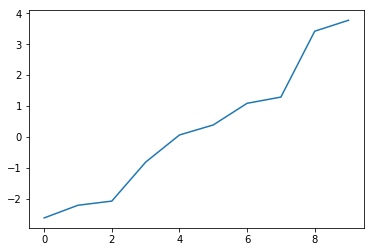

In [155]:
n_samples = 10
x = np.sort(np.random.randn(n_samples))
y = np.multiply(3, x)
plt.plot(y)
plt.show()

In [156]:
# tf 그래프 입력
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")


# Construct a linear model
pred = tf.add(tf.multiply(W, X), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

dc_dw, dc_db = tf.gradients(cost, [W, b])

params = tf.stack([W,b], axis=0)
x_flat = tf.constant(np.random.normal(0, 1, 2))

init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)
    output = session.run([dc_dw, dc_db, W, b], feed_dict={X:x, Y:y})
    print(output)

[-1.820898, -0.13212669, -0.605325, 0.14222902]


In [157]:
np.dot(x,(np.multiply(-0.10788918,x)+1.0033976 )-y)/n_samples #=dc/db

-1.5026380742560232

In [158]:
import tensorflow as tf

x = tf.Variable(3, name='x', dtype=tf.float32)
log_x = tf.log(x)
log_x_squared_times_x = tf.multiply(tf.square(log_x), x)

optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(log_x_squared_times_x)
grad = tf.gradients(log_x_squared_times_x, x)
init = tf.global_variables_initializer()


with tf.Session() as session:
    session.run(init)
    print("starting at", "x:", session.run(x), "log(x)^2:", session.run(log_x_squared_times_x))
    for step in range(20):  
        session.run(train)
        print("step", step, "x:", session.run(x), "log(x)^2:", session.run(log_x_squared_times_x),"Grad",
             session.run(grad))
        

starting at x: 3.0 log(x)^2: 3.620847
step 0 x: 2.6595826 log(x)^2: 2.5447285 Grad [2.9131534]
step 1 x: 2.3682673 log(x)^2: 1.7603743 Grad [2.4676347]
step 2 x: 2.1215038 log(x)^2: 1.2001184 Grad [2.0699427]
step 3 x: 1.9145095 log(x)^2: 0.8075404 Grad [1.720723]
step 4 x: 1.7424372 log(x)^2: 0.5372653 Grad [1.418911]
step 5 x: 1.6005461 log(x)^2: 0.35407972 Grad [1.1619141]
step 6 x: 1.4843547 log(x)^2: 0.2315732 Grad [0.94596964]
step 7 x: 1.3897578 log(x)^2: 0.15054718 Grad [0.7665851]
step 8 x: 1.3130993 log(x)^2: 0.09742726 Grad [0.6189768]
step 9 x: 1.2512016 log(x)^2: 0.06283882 Grad [0.49843156]
step 10 x: 1.2013584 log(x)^2: 0.0404317 Grad [0.4005609]
step 11 x: 1.1613023 log(x)^2: 0.02597001 Grad [0.32144699]
step 12 x: 1.1291577 log(x)^2: 0.016661206 Grad [0.2576993]
step 13 x: 1.1033877 log(x)^2: 0.010680401 Grad [0.20645002]
step 14 x: 1.0827427 log(x)^2: 0.0068427483 Grad [0.16531454]
step 15 x: 1.0662112 log(x)^2: 0.0043824245 Grad [0.13233317]
step 16 x: 1.0529779 log(

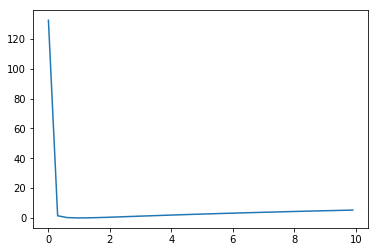

In [159]:
x=np.arange(0.00001, 10, 0.3)
y=np.log(x)
y=np.power(y, 2)
plt.plot(x,y)
plt.show()

In [160]:
import tensorflow as tf

x = tf.Variable(3, name='x', dtype=tf.float32)
log_x = tf.log(x)
log_x_squared_times_x = tf.multiply(tf.square(log_x), x)

optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(log_x_squared_times_x)
grad = tf.gradients(log_x_squared_times_x, x)
init = tf.global_variables_initializer()


with tf.Session() as session:
    session.run(init)
    print("starting at", "x:", session.run(x), "log(x)^2:", session.run(log_x_squared_times_x))
    for step in range(20):  
        session.run(train)
        print("step", step, "x:", session.run(x), "log(x)^2:", session.run(log_x_squared_times_x),"Grad",
             session.run(grad))
        

starting at x: 3.0 log(x)^2: 3.620847
step 0 x: 2.6595826 log(x)^2: 2.5447285 Grad [2.9131534]
step 1 x: 2.3682673 log(x)^2: 1.7603743 Grad [2.4676347]
step 2 x: 2.1215038 log(x)^2: 1.2001184 Grad [2.0699427]
step 3 x: 1.9145095 log(x)^2: 0.8075404 Grad [1.720723]
step 4 x: 1.7424372 log(x)^2: 0.5372653 Grad [1.418911]
step 5 x: 1.6005461 log(x)^2: 0.35407972 Grad [1.1619141]
step 6 x: 1.4843547 log(x)^2: 0.2315732 Grad [0.94596964]
step 7 x: 1.3897578 log(x)^2: 0.15054718 Grad [0.7665851]
step 8 x: 1.3130993 log(x)^2: 0.09742726 Grad [0.6189768]
step 9 x: 1.2512016 log(x)^2: 0.06283882 Grad [0.49843156]
step 10 x: 1.2013584 log(x)^2: 0.0404317 Grad [0.4005609]
step 11 x: 1.1613023 log(x)^2: 0.02597001 Grad [0.32144699]
step 12 x: 1.1291577 log(x)^2: 0.016661206 Grad [0.2576993]
step 13 x: 1.1033877 log(x)^2: 0.010680401 Grad [0.20645002]
step 14 x: 1.0827427 log(x)^2: 0.0068427483 Grad [0.16531454]
step 15 x: 1.0662112 log(x)^2: 0.0043824245 Grad [0.13233317]
step 16 x: 1.0529779 log(

In [161]:
import tensorflow as tf

x = tf.Variable(2, name='x', dtype=tf.float32)
y = tf.Variable(2, name='y', dtype=tf.float32)

temperature = 50 - 3*tf.square(y) - tf.square(x)

optimizer = tf.train.GradientDescentOptimizer(0.05)
train = optimizer.minimize(temperature)
grad = tf.gradients(temperature, [x,y])

init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)
    x1, y1, t1 = session.run([x, y, temperature])
    print("Starting at cordinate x={}, y={} and temperature there is {}".format(x1, y1, t1 ))
    grad_norms = []
    temperatures = []
    gradients = [] 
    coordinates = []
    for step in range(10):  
        session.run(train)
        g = session.run(grad)
        x1, y1, t1 = session.run([x, y, temperature])
        print("step ({})  x={},y={}, T={}, Gradient={}".format(step,x1, y1, t1,g))
        grad_norms.append(np.linalg.norm(g))
        temperatures.append(t1)
        gradients.append(g)
        coordinates.append([x1, y1])

Starting at cordinate x=2.0, y=2.0 and temperature there is 34.0
step (0)  x=2.200000047683716,y=2.5999999046325684, T=24.880001068115234, Gradient=[-4.4, -15.599999]
step (1)  x=2.4200000762939453,y=3.379999876022339, T=9.870402336120605, Gradient=[-4.84, -20.279999]
step (2)  x=2.6620001792907715,y=4.394000053405762, T=-15.007951736450195, Gradient=[-5.3240004, -26.364]
step (3)  x=2.9282002449035645,y=5.712200164794922, T=-56.46205139160156, Gradient=[-5.8564005, -34.2732]
step (4)  x=3.221020221710205,y=7.425860404968262, T=-125.80517578125, Gradient=[-6.4420404, -44.55516]
step (5)  x=3.5431222915649414,y=9.653618812561035, T=-242.13079833984375, Gradient=[-7.0862446, -57.921715]
step (6)  x=3.8974344730377197,y=12.549704551696777, T=-437.6752624511719, Gradient=[-7.794869, -75.298225]
step (7)  x=4.287178039550781,y=16.31461524963379, T=-766.8798828125, Gradient=[-8.574356, -97.887695]
step (8)  x=4.715895652770996,y=21.208999633789062, T=-1321.70458984375, Gradient=[-9.431791, -

In [162]:
temperatures[1], coordinates[1],gradients[1] # also agrees with the math for partial derivatives

(9.870402, [2.42, 3.3799999], [-4.84, -20.279999])

In [163]:
temperatures[:5]

[24.880001, 9.870402, -15.007952, -56.46205, -125.805176]

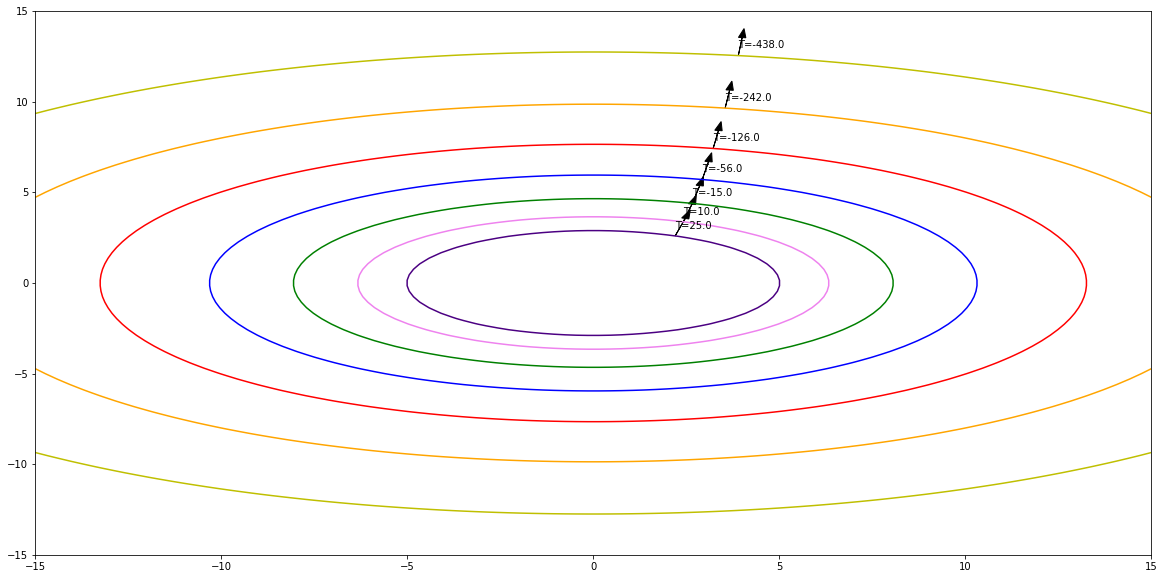

In [164]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
xlist = np.linspace(-15.0, 15.0, 100) # Create 1-D arrays for x,y dimensions
ylist = np.linspace(-15.0, 15.0, 100)
X,Y = np.meshgrid(xlist, ylist) # Create 2-D grid xlist,ylist values
Z = 50 - X**2 - 3*Y**2  # Compute function values on the grid
num_contours = 7
#Contour levels must be increasing 
contour_level = temperatures[:num_contours]
list.reverse(contour_level)
plt.contour(X, Y, Z, contour_level, colors = ['y','orange','red','blue','g','violet','indigo','black'], linestyles = 'solid')

#ax.annotate('Direction Of Gradident', xy=(.6, 0.3), xytext=(.6, 0.3))
for i in range(num_contours):
    ax.annotate('T={}'.format(np.round(temperatures[i])),
                            xy=tuple(np.array([0,0.4]) + np.array(coordinates[i])),
                            xytext=tuple(np.array([0,0.4]) + np.array(coordinates[i])))


for i in range(num_contours):    
    norm_grad = -np.array(gradients[i]/(np.linalg.norm(gradients[i])+0.00000001))
    ax.arrow(coordinates[i][0],coordinates[i][1], norm_grad[0],norm_grad[1], head_width=0.2, head_length=0.5, fc='k', ec='k')


plt.show()

In [165]:
contour_level = temperatures[:5]
list.reverse(contour_level)
temperatures

[24.880001,
 9.870402,
 -15.007952,
 -56.46205,
 -125.805176,
 -242.1308,
 -437.67526,
 -766.8799,
 -1321.7046,
 -2257.5056]

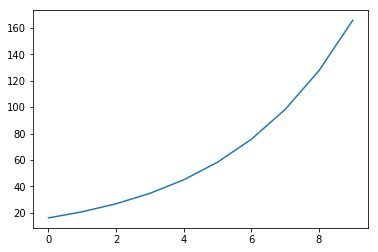

In [166]:
plt.plot(grad_norms)
plt.show()

In [167]:
-np.array(gradients[i]/(np.linalg.norm(gradients[i])+0.00000001))

array([0.1029697, 0.9946846], dtype=float32)

In [168]:
x = [1, 2, 3, 4, 5, 6, 7]
m = 3
np.convolve(x, np.ones((m,))/m, mode='valid')

array([2., 3., 4., 5., 6.])